 # 5. Data Analysis with Finance Stock
 + Data import.
 + Data Visualization & Return.
 + Backtesting a Simple Momentum Strategy.
 + More Complex Strategies & Backtesting Vs. Fitting.
 + Simple Moving Average (SMA).
 + Backtesting Simple Moving Average.
 + Backtesting the Perfect Strategy In Case You Can Predict The Future.

<img src="img/fx-stock.png" width="" align="" />

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("data/5-dji.csv")

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-01-03,12459.540039,12580.349609,12404.820312,12474.519531,12474.519531,327200000
1,2007-01-04,12473.160156,12510.410156,12403.860352,12480.690430,12480.690430,259060000
2,2007-01-05,12480.049805,12480.129883,12365.410156,12398.009766,12398.009766,235220000
3,2007-01-08,12392.009766,12445.919922,12337.370117,12423.490234,12423.490234,223500000
4,2007-01-09,12424.769531,12466.429688,12369.169922,12416.599609,12416.599609,225190000
...,...,...,...,...,...,...,...
3328,2020-03-24,19722.189453,20737.699219,19649.250000,20704.910156,20704.910156,799340000
3329,2020-03-25,21050.339844,22019.929688,20538.339844,21200.550781,21200.550781,796320000
3330,2020-03-26,21468.380859,22595.060547,21427.099609,22552.169922,22552.169922,705180000
3331,2020-03-27,21898.470703,22327.570312,21469.269531,21636.779297,21636.779297,588830000


<div style="background-color: #FF0051; display: inline-block; width: 900px; height: 80px; border-radius: 25px;">
<img width="80" height="80" src="https://img.icons8.com/dotty/80/line-chart.png" alt="line-chart"/>
<h1 style="margin: -60px 0 0 100px;">Data Visualization & Return</h1>

> Data Visualization & Return.

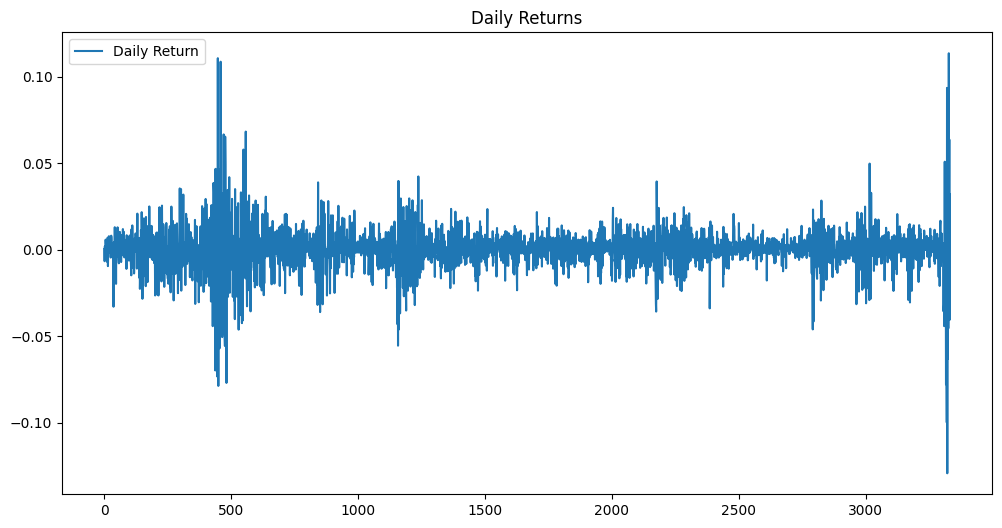

In [7]:
# Calculate daily returns
df['Daily Return'] = df['Adj Close'].pct_change()

# Plot daily returns
df['Daily Return'].plot(figsize=(12, 6), legend=True, title='Daily Returns')
plt.show()

The daily returns have been calculated and visualized. 

<div style="background-color: #FF0051; display: inline-block; width: 900px; height: 80px; border-radius: 25px;">
<img width="80" height="80" src="https://img.icons8.com/dusk/50/strategy-board.png" alt="strategy-board"/>
<h1 style="margin: -60px 0 0 100px;">Simple Momentum Strategy</h1>

> Backtesting a Simple Momentum Strategy.

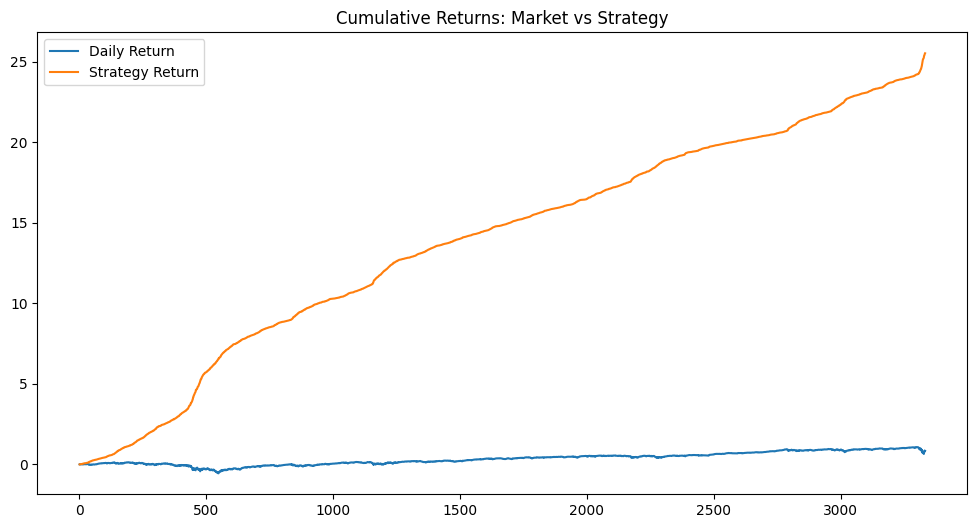

In [8]:
# Define a simple momentum strategy
# Buy signal: If the daily return is positive
# Sell signal: If the daily return is negative

df['Strategy'] = np.where(df['Daily Return'] > 0, 1, -1)

# Calculate strategy returns
# Strategy return = Strategy signal * Daily return
df['Strategy Return'] = df['Strategy'] * df['Daily Return']

# Plot cumulative returns for both the strategy and the market
(df[['Daily Return', 'Strategy Return']].cumsum()).plot(figsize=(12, 6), title='Cumulative Returns: Market vs Strategy')
plt.show()

The cumulative returns for the simple momentum strategy and the market have been plotted. 

<div style="background-color: #FF0051; display: inline-block; width: 900px; height: 80px; border-radius: 25px;">
<img width="80" height="80" src="https://img.icons8.com/external-flaticons-flat-flat-icons/64/external-strategy-digital-marketing-flaticons-flat-flat-icons.png" alt="external-strategy-digital-marketing-flaticons-flat-flat-icons"/>
<h1 style="margin: -60px 0 0 100px;">Complex Strategies</h1>

> More Complex Strategies & Backtesting Vs. Fitting.

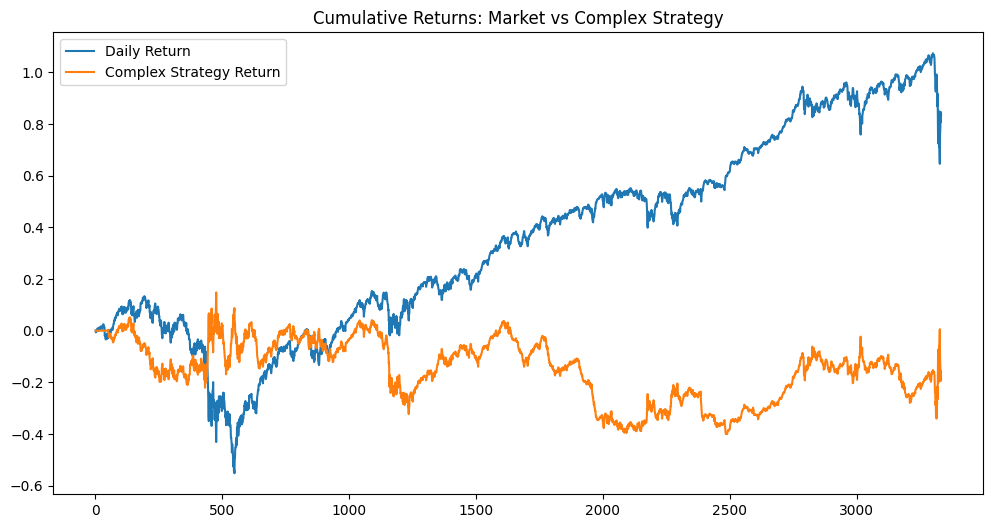

In [9]:
# Implementing a more complex strategy: Moving Average Crossover
# Short-term moving average (e.g., 20 days) and long-term moving average (e.g., 50 days)

# Calculate moving averages
df['Short MA'] = df['Adj Close'].rolling(window=20).mean()
df['Long MA'] = df['Adj Close'].rolling(window=50).mean()

# Define signals
# Buy signal: When short MA crosses above long MA
# Sell signal: When short MA crosses below long MA
df['Signal'] = 0
df.loc[df['Short MA'] > df['Long MA'], 'Signal'] = 1
df.loc[df['Short MA'] <= df['Long MA'], 'Signal'] = -1

# Calculate strategy returns based on the signals
df['Complex Strategy Return'] = df['Signal'].shift(1) * df['Daily Return']

# Plot cumulative returns for the complex strategy and the market
(df[['Daily Return', 'Complex Strategy Return']].cumsum()).plot(figsize=(12, 6), title='Cumulative Returns: Market vs Complex Strategy')
plt.show()

The cumulative returns for the complex moving average crossover strategy and the market have been plotted. 

<div style="background-color: #FF0051; display: inline-block; width: 900px; height: 80px; border-radius: 25px;">
<img width="80" height="80" src="https://img.icons8.com/external-outline-black-m-oki-orlando/32/external-moving-average-data-science-outline-outline-black-m-oki-orlando.png" alt="external-moving-average-data-science-outline-outline-black-m-oki-orlando"/>
<h1 style="margin: -60px 0 0 100px;">Moving Average</h1>

> Simple Moving Average (SMA).

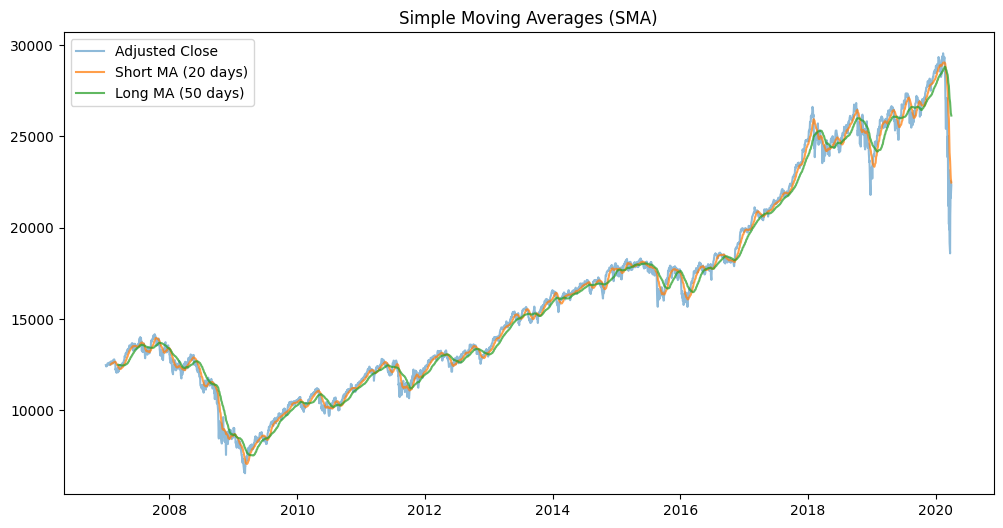

In [10]:
# Plot the Simple Moving Averages (SMA) along with the Adjusted Close price
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Adj Close'], label='Adjusted Close', alpha=0.5)
plt.plot(df['Date'], df['Short MA'], label='Short MA (20 days)', alpha=0.75)
plt.plot(df['Date'], df['Long MA'], label='Long MA (50 days)', alpha=0.75)
plt.title('Simple Moving Averages (SMA)')
plt.legend()
plt.show()

The Simple Moving Averages (SMA) for both the short-term (20 days) and long-term (50 days) have been plotted alongside the Adjusted Close price. 

<div style="background-color: #FF0051; display: inline-block; width: 900px; height: 80px; border-radius: 25px;">
<img width="80" height="80" src="https://img.icons8.com/external-flaticons-lineal-color-flat-icons/64/external-average-data-analytics-flaticons-lineal-color-flat-icons-2.png" alt="external-average-data-analytics-flaticons-lineal-color-flat-icons-2"/><h1 style="margin: -60px 0 0 100px;">Backtesting Moving Average</h1>

> Backtesting Simple Moving Average.

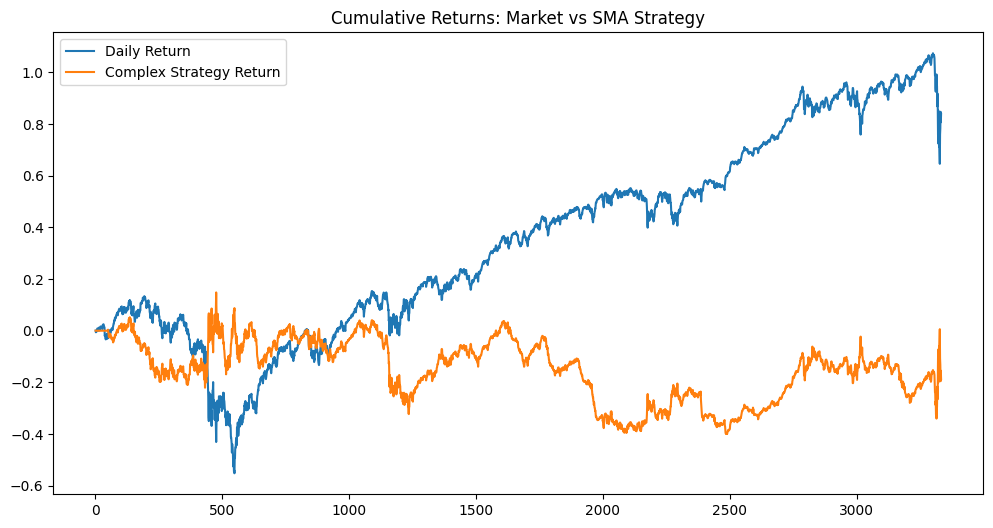

In [11]:
# Backtesting the Simple Moving Average (SMA) strategy
# Calculate cumulative returns for the SMA strategy and the market
cumulative_returns = (df[['Daily Return', 'Complex Strategy Return']].cumsum())

# Plot cumulative returns
cumulative_returns.plot(figsize=(12, 6), title='Cumulative Returns: Market vs SMA Strategy')
plt.show()

The cumulative returns for the Simple Moving Average (SMA) strategy and the market have been plotted. 

<div style="background-color: #FF0051; display: inline-block; width: 900px; height: 80px; border-radius: 25px;">
<img width="80" height="80" src="https://img.icons8.com/arcade/50/critical-thinking.png" alt="critical-thinking"/>
<h1 style="margin: -60px 0 0 100px;">Perfect Strategy</h1>

> Backtesting the Perfect Strategy In Case You Can Predict The Future.

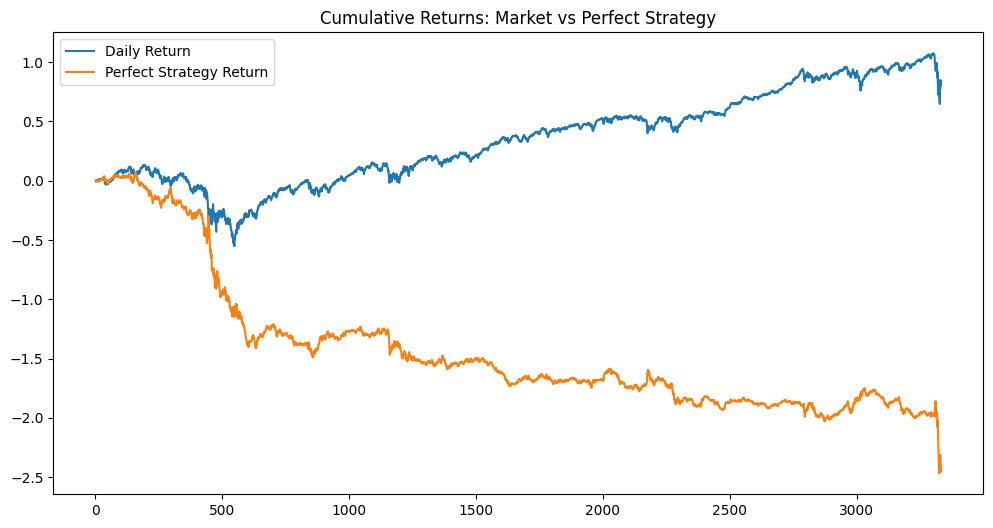

In [12]:
# Backtesting the perfect strategy (assuming perfect foresight)
# Buy signal: If the next day's return is positive
# Sell signal: If the next day's return is negative

df['Perfect Signal'] = np.where(df['Daily Return'].shift(-1) > 0, 1, -1)

# Calculate perfect strategy returns
df['Perfect Strategy Return'] = df['Perfect Signal'] * df['Daily Return']

# Plot cumulative returns for the perfect strategy and the market
(df[['Daily Return', 'Perfect Strategy Return']].cumsum()).plot(figsize=(12, 6), title='Cumulative Returns: Market vs Perfect Strategy')
plt.show()

The cumulative returns for the perfect strategy (assuming perfect foresight) and the market have been plotted.